We added the ability to store metadata about molecules in the PNG and SVG images that the RDKit generates some years ago. This tutorial post shows how to use that information.

These days you can do some pretty amazing work with using a deep neural network to "understand" the image and translate it into a chemical structure, but it's a lot easier (and less noisy!) to just save the molecular structure as part of the image file itself.

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole

from PIL import Image

import rdkit
print(rdkit.__version__)

2024.09.5


Read in some molecules and generating coordinates for them.

In [2]:
import pandas as pd
df = pd.read_csv('../data/S1P1_data.csv')
ms = [Chem.MolFromSmiles(x) for x in df.canonical_smiles][:12]
for m in ms:
    rdDepictor.Compute2DCoords(m)

In [3]:
df.columns

Index(['doc_id', 'molregno', 'standard_relation', 'standard_value',
       'standard_units', 'standard_flag', 'standard_type', 'pchembl_value',
       'canonical_smiles', 'compound_chembl_id'],
      dtype='object')

# Working with PNGs

Generate a PNG image of one molecule:

In [4]:
d2d = Draw.MolDraw2DCairo(300,300)
d2d.DrawMolecule(ms[0])
d2d.FinishDrawing()
d2d.WriteDrawingText('img1.png')

Read the image in and display it:

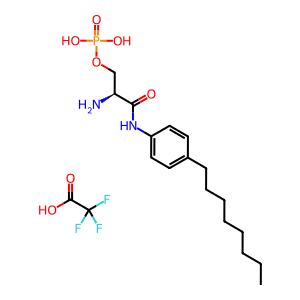

In [5]:
img = Image.open('img1.png')
img


The PNG contains metadata allowing us to reconstruct the molecule; you do that with `MolFromPNGFile()`:

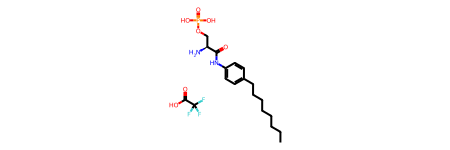

In [5]:
nmol = Chem.MolFromPNGFile('img1.png')
nmol

## Additional metadata

There's also a function to add additional metadata to the PNG file. Here we'll just add the information about the molecule that we read in from the input CSV file:

In [6]:
df.iloc[0]

doc_id                                                             5839
molregno                                                         189018
standard_relation                                                     =
standard_value                                                     82.0
standard_units                                                       nM
standard_flag                                                         1
standard_type                                                      EC50
pchembl_value                                                      7.09
canonical_smiles      CCCCCCCCc1ccc(NC(=O)[C@@H](N)COP(=O)(O)O)cc1.O...
compound_chembl_id                                         CHEMBL332050
Name: 0, dtype: object

In [6]:
# get a string with PNG data:
d2d = Draw.MolDraw2DCairo(300,300)
d2d.DrawMolecule(ms[0])
d2d.FinishDrawing()
png = d2d.GetDrawingText()

# construct a dictionary with the metadat we want to add:
metadata = {k:str(v) for k,v in zip(df.iloc[0].keys(),df.iloc[0])}

# and then add the data to the PNG string:
png = Chem.AddMetadataToPNGString(metadata,png)



Read the molecule and the metadata from the PNG string:

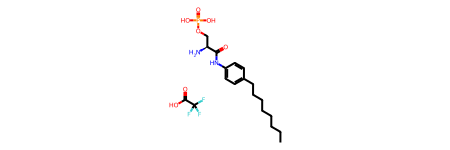

In [7]:
nm = Chem.MolFromPNGString(png)
nprops = Chem.MetadataFromPNGString(png)
nm

In [8]:
nprops.keys()

dict_keys(['rdkitPKL rdkit 2024.09.5', 'MOL rdkit 2024.09.5', 'SMILES rdkit 2024.09.5', 'doc_id', 'molregno', 'standard_relation', 'standard_value', 'standard_units', 'standard_flag', 'standard_type', 'pchembl_value', 'canonical_smiles', 'compound_chembl_id'])

Here we can see metadata that the RDKit added - pkl data, a Mol block, and SMILES - as well as the properties that we added. The Mol block and the SMILES can be used by other tools, so there's a bit of interoperability here too.

The values are all strings:

In [9]:
nprops['compound_chembl_id'], nprops['pchembl_value']

(b'CHEMBL332050', b'7.09')

# Working with multiple molecules

We can also store/retrieve multiple molecules to/from a PNG:

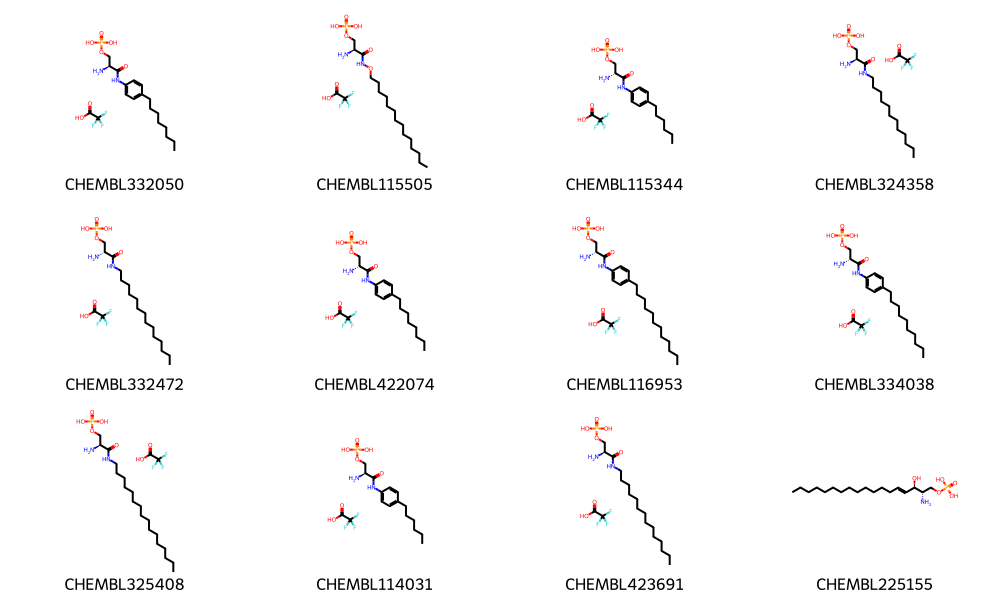

In [10]:
img = Draw.MolsToGridImage(ms[:12],molsPerRow=4,subImgSize=(250,200),legends=df.compound_chembl_id.to_list())
img

In [11]:
type(img)

IPython.core.display.Image

Write the image to a file and then display it (just as a demo):

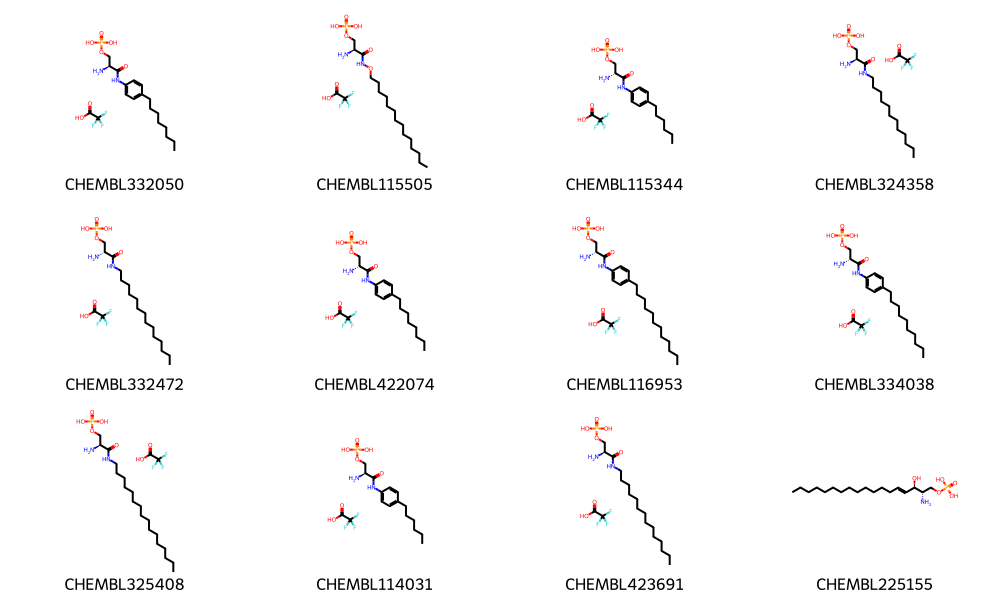

In [12]:
with open('img1.png','wb+') as outf:
    outf.write(img.data)
newImg = Image.open('img1.png')
newImg

The call to read multiple molecules from a PNG is `MolsFromPNGFile()`:

In [14]:
nmols = Chem.MolsFromPNGFile('img1.png')
print(len(nmols))

12


Look at the first molecule:

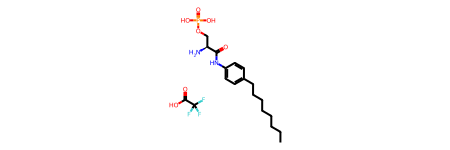

In [15]:
nmols[0]

In case you're curious, here's what the keys for the metadata in the PNG file are:

In [16]:
nmd = Chem.MetadataFromPNGFile('img1.png')
nmd.keys()

dict_keys(['rdkitPKL rdkit 2024.09.5', 'MOL rdkit 2024.09.5', 'SMILES rdkit 2024.09.5', 'rdkitPKL1 rdkit 2024.09.5', 'MOL1 rdkit 2024.09.5', 'SMILES1 rdkit 2024.09.5', 'rdkitPKL2 rdkit 2024.09.5', 'MOL2 rdkit 2024.09.5', 'SMILES2 rdkit 2024.09.5', 'rdkitPKL3 rdkit 2024.09.5', 'MOL3 rdkit 2024.09.5', 'SMILES3 rdkit 2024.09.5', 'rdkitPKL4 rdkit 2024.09.5', 'MOL4 rdkit 2024.09.5', 'SMILES4 rdkit 2024.09.5', 'rdkitPKL5 rdkit 2024.09.5', 'MOL5 rdkit 2024.09.5', 'SMILES5 rdkit 2024.09.5', 'rdkitPKL6 rdkit 2024.09.5', 'MOL6 rdkit 2024.09.5', 'SMILES6 rdkit 2024.09.5', 'rdkitPKL7 rdkit 2024.09.5', 'MOL7 rdkit 2024.09.5', 'SMILES7 rdkit 2024.09.5', 'rdkitPKL8 rdkit 2024.09.5', 'MOL8 rdkit 2024.09.5', 'SMILES8 rdkit 2024.09.5', 'rdkitPKL9 rdkit 2024.09.5', 'MOL9 rdkit 2024.09.5', 'SMILES9 rdkit 2024.09.5', 'rdkitPKL10 rdkit 2024.09.5', 'MOL10 rdkit 2024.09.5', 'SMILES10 rdkit 2024.09.5', 'rdkitPKL11 rdkit 2024.09.5', 'MOL11 rdkit 2024.09.5', 'SMILES11 rdkit 2024.09.5'])

# Working with SVG

We can do the same thing with SVG. At the moment we only support a single molecule per SVG file and the metadata is not added by default

<?xml vers


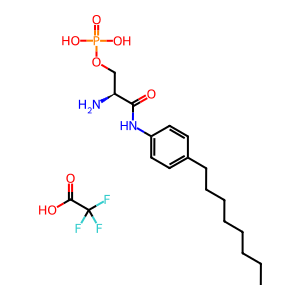

In [18]:
from IPython.display import SVG

d2d = Draw.MolDraw2DSVG(300,300)
d2d.DrawMolecule(ms[0])

# add the molecule metadata:
d2d.AddMoleculeMetadata(ms[0])

d2d.FinishDrawing()
svg = d2d.GetDrawingText()
# look at the first few characters of the string:
print(svg[:10])

# display the SVG
SVG(svg)

Write the SVG to a file and read it back in:

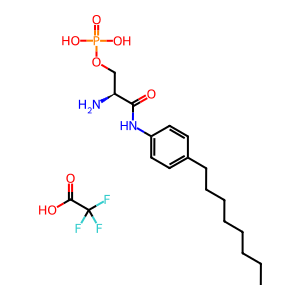

In [19]:
from IPython.display import SVG
with open('img1.svg','w+') as outf:
    outf.write(svg)

with open('img1.svg','r') as inf:
    newData = inf.read()

newSVG = SVG(newData)
newSVG


Now read the molecule back from the SVG:

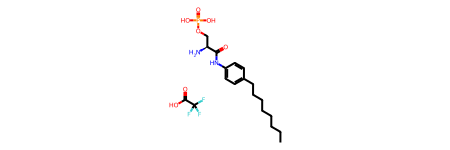

In [20]:
nmol = Chem.MolFromRDKitSVG(newData)
nmol

# Last notes

I won't demonstrate it here in this short post, but chemical reactions can also be stored in/retrieved from PNG files (though currently not SVG files). As with molecules, the data is automatically added to the PNG when a reaction is drawn. It can be retrieved with the function `rdChemReactions.ReactionFromPNGString()` or `rdChemReactions.ReactionFromPNGFile()`.

I was going to demo this by grabbing an image from a website that I know uses the RDKit for molecule display, like ChEMBL or the PDBE, but both of those use SVGs for their images and they haven't made the extra call to add the molecular metadata to those SVGs (this may be intentional, since the metadata does make the SVG files a bit larger).

One thing we've noticed is that if you embed one of these PNGs into a Word or PowerPoint document, the metadata ends up being lost when you copy the image back out of the document. However, if you unzip the .docx or .pptx file and look at the PNG there, the metadata is still present, so not all is lost.

Anyway, I think it's pretty cool to be able to save a compound's structure as part of its image. Hopefully others agree. :-)
